In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection

### 資料讀入及前處理

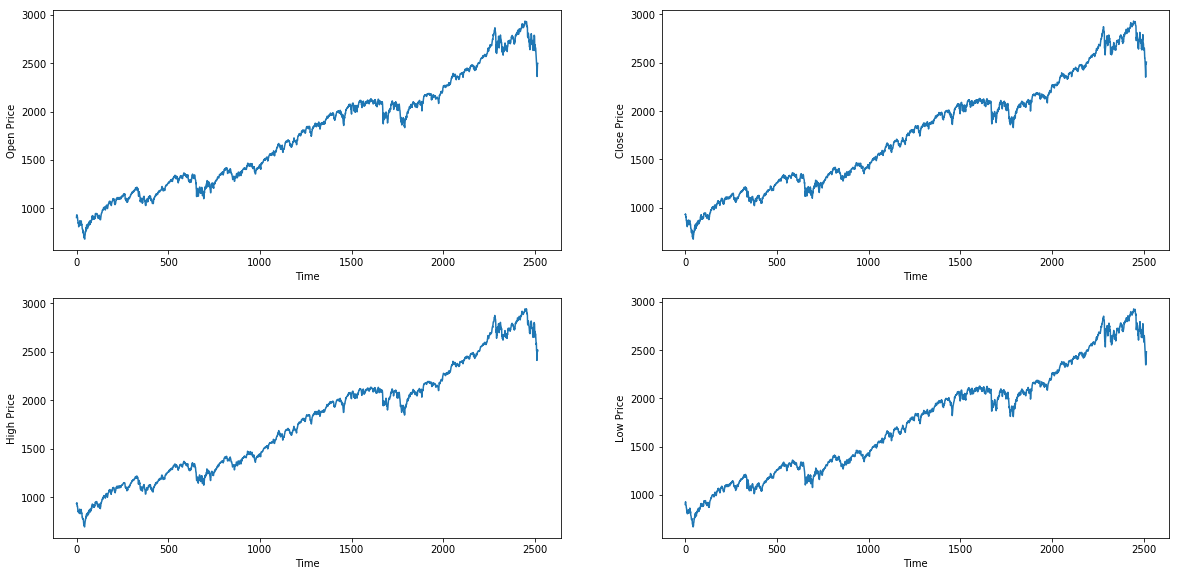

,Volume,D,d,Price Fluctuation,Volume Fluctuation,up
0,4048270080,28.81,35.38,NaN,NaN,0.0
1,5413910016,-1.72,17.10,-4.35,1.365640e+09,1.0
2,5392620032,3.53,16.57,7.25,-2.128998e+07,0.0
3,4704940032,-20.80,25.08,-28.05,-6.876800e+08,1.0
4,4991549952,4.00,13.19,3.08,2.866099e+08,0.0


In [2]:
data=pd.read_csv("download.csv")
data=data.drop(["Date"], axis=1)

plt.figure(figsize=(20,15))
for i in range(0, 4):    
    plt.subplot(3, 2, i+1)
    plt.plot(range(len(data)), data.iloc[:, i])
    plt.xlabel("Time")
    plt.ylabel(data.columns[i])
plt.show()

for i in data.index[:]:
    data.loc[i, "D"]=data["Close Price"][i]-data["Open Price"][i]
    data.loc[i, "d"]=data["High Price"][i]-data["Low Price"][i]
for i in data.index[1:]:
    data.loc[i, "Price Fluctuation"]=data["Close Price"][i]-data["Close Price"][i-1]
    data.loc[i, "Volume Fluctuation"]=data["Volume"][i]-data["Volume"][i-1]
for i in data.index[:-1]:
    if data["Close Price"][i+1]-data["Close Price"][i]>0:
        data.loc[i, "up"]=1
    else:
        data.loc[i, "up"]=0
        
data=data.drop(["Close Price", "Open Price", "High Price", "Low Price"], axis=1)
x_train=data.loc[1:2263, data.columns!="up"]
y_train=data.loc[1:2263:, "up"]
x_test=data.loc[2264:2514, data.columns!="up"]
y_test=data.loc[2264:2514, "up"]
data.head()

### 訓練資料標準化

In [3]:
from sklearn.preprocessing import normalize, StandardScaler

scaler=StandardScaler()
scaler.fit(x_train)

x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
'''
x_train=normalize(x_train)
x_test=normalize(x_test)'''

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


'\nx_train=normalize(x_train)\nx_test=normalize(x_test)'

### 作圖

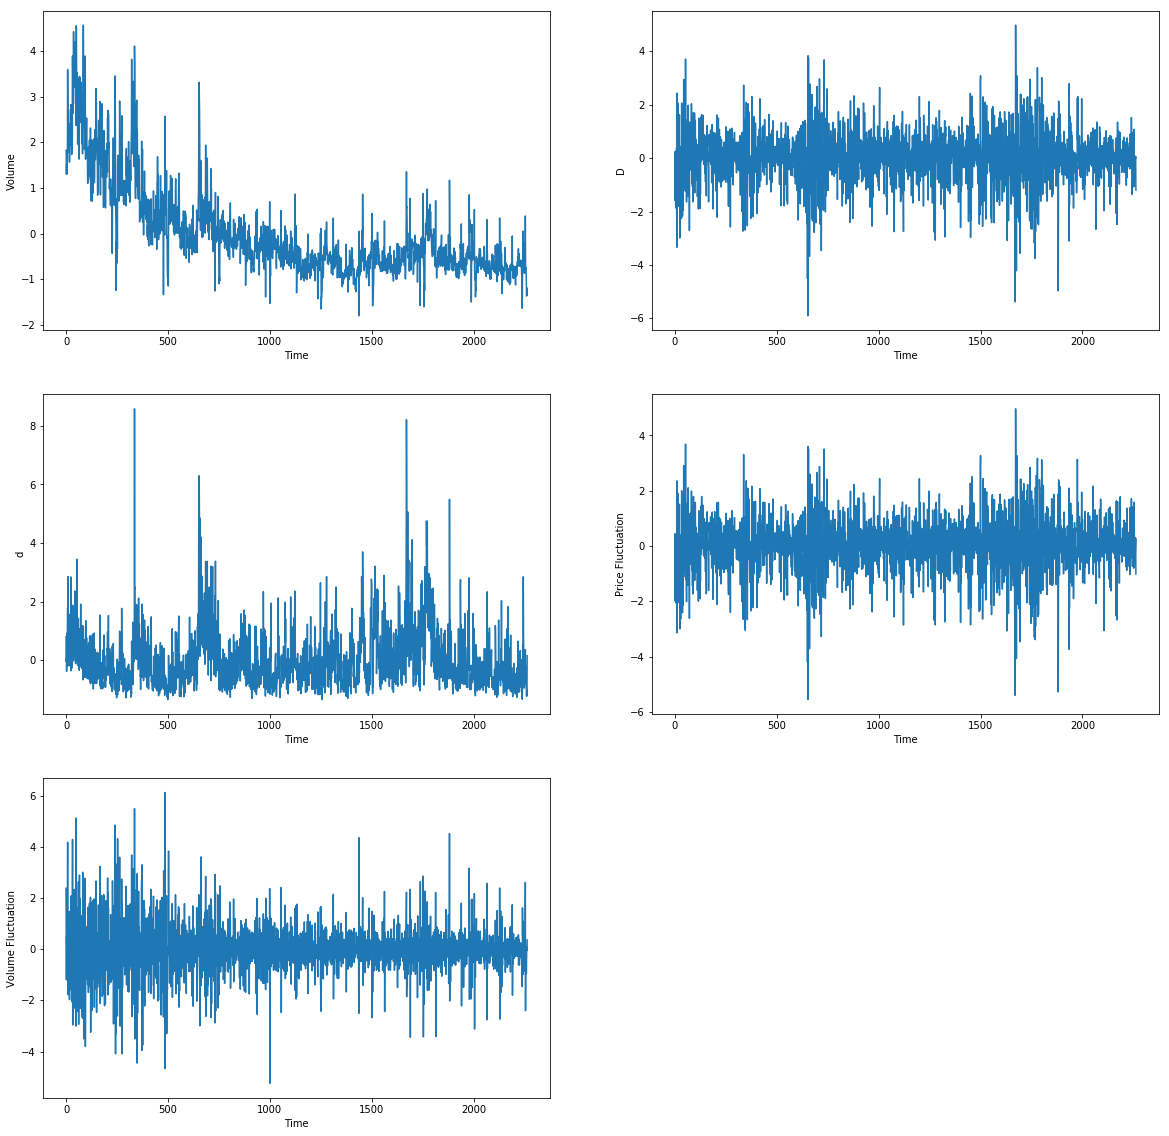

In [4]:
plt.figure(figsize=(20,20))
for i in range(0, 5):    
    plt.subplot(3, 2, i+1)
    plt.plot(range(len(x_train)), x_train[:, i])
    plt.xlabel("Time")
    plt.ylabel(data.columns[i])
plt.show()

### 計算準確率

In [5]:
from sklearn.metrics import accuracy_score

def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds=model.predict(x_train)
    test_preds=model.predict(x_test)
    train_acc=accuracy_score(y_train, train_preds)
    test_acc=accuracy_score(y_test, test_preds)
    print(test_preds!=1)
    print("Train accuracy: ", train_acc)
    print("Test accuracy: ", test_acc)

### Logistic Regression Model

In [6]:
from sklearn.linear_model import LogisticRegression

model_lr=LogisticRegression()
model_lr.fit(x_train, y_train)
evaluate(model_lr, x_train, y_train, x_test, y_test)

[False False False False False False False False False False  True False
 False  True False False False  True False False False False False False
  True False False  True  True False  True  True False False False False
  True  True False False False  True  True False False False  True False
 False False False False False False False False False  True False False
  True False  True  True False False False  True False False False False
  True False False False False False False  True False False False False
 False  True False False  True  True False False False False False False
 False False False False False False  True False False False False  True
 False False False False False False False False False False False False
 False False False False False False False  True  True  True False False
 False False False False False False False False False  True False False
 False False False  True False False False False False False False False
 False False False False False False False False Fa

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### SVM Model

In [7]:
from sklearn.svm import SVC

penalty=1
model_svm=SVC(C=penalty, kernel="poly", degree=5, probability=True)
model_svm.fit(x_train, y_train.values)
evaluate(model_svm, x_train, y_train, x_test, y_test)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False  True  True False  True False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False  True False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

### Neural Network Model

In [8]:
import tensorflow as tf
from keras import models, layers, optimizers, regularizers

hidden_units=13    
activation="relu"
l2=0
learning_rate=0.01
epochs=20
batch_size=32

model_nn=models.Sequential()
model_nn.add(layers.Dense(input_dim=5,
                       units=hidden_units, 
                       activation=activation,
                       kernel_regularizer=regularizers.l2(l2)))
model_nn.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation="sigmoid",
                       kernel_regularizer=regularizers.l2(l2)))
model_nn.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=["accuracy"])
class_weight={
    0:1.,
    1:1237/2264
}

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2263/2263 [==============================] - 3s 1ms/step - loss: 0.5163 - acc: 0.4812
Epoch 2/20
2263/2263 [==============================] - 0s 84us/step - loss: 0.5075 - acc: 0.4578
Epoch 3/20
2263/2263 [==============================] - 0s 84us/step - loss: 0.5054 - acc: 0.4543
Epoch 4/20
2263/2263 [==============================] - 0s 85us/step - loss: 0.5056 - acc: 0.4565
Epoch 5/20
2263/2263 [==============================] - 0s 87us/step - loss: 0.5044 - acc: 0.4569
Epoch 6/20
2263/2263 [==============================] - 0s 99us/step - loss: 0.5037 - acc: 0.4618
Epoch 7/20
2263/2263 [==============================] - 0s 88us/step - loss: 0.5038 - acc: 0.4596
Epoch 8/20
2263/2263 [==============================] - 0s 98us/step - loss: 0.5038 - acc: 0.4565
Epoch 9/20
2263/2263 [==============================] - 0s 93us/step - loss: 0.5047 - acc: 0.4569
Epoch 10/20
2263/2263 [==============================] - 0s 101us/step 

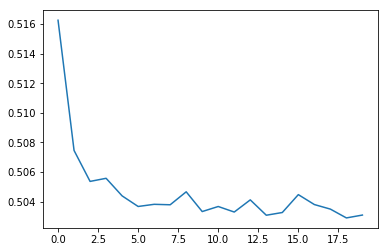

In [9]:
history=model_nn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, class_weight=class_weight)
train_acc=model_nn.evaluate(x_train, y_train, batch_size=batch_size)[1]
test_acc=model_nn.evaluate(x_test, y_test, batch_size=batch_size)[1]
print("Training accuracy: %s" % train_acc)
print("Testing accuracy: %s" % test_acc)

losses=history.history['loss']
plt.plot(range(len(losses)), losses)
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.91s/it]


Avgerage Training Accuracy: 0.4905877154114707
Avgerage Testing Accuracy: 0.48127490001845635


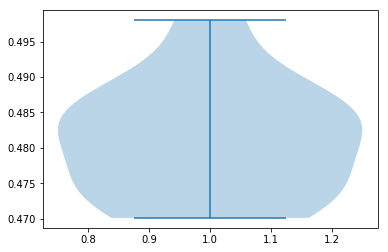

Min: 0.4701195206062727
Max: 0.49800796694014654


In [10]:
from tqdm import tqdm

def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=10):
    train_accs=[]
    test_accs=[]
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print("Avgerage Training Accuracy: %s" % np.average(train_accs))
    print("Avgerage Testing Accuracy: %s" % np.average(test_accs))
    return train_accs, test_accs

_, test_accs=train_and_evaluate(model_nn, x_train, y_train, x_test, y_test)
plt.violinplot(test_accs)
plt.show()
print('Min: %s' % np.min(test_accs))
print('Max: %s' % np.max(test_accs))

# Report
### 前處理
#### 最一開始時我並沒有對資料做太多的前處理：讀入資料後僅由前後兩天的收盤價(Close Price)相減，得到當日的漲跌狀態，接著區隔訓練和測試資料以及標準化，並且嘗試用Ridge Regression分析各個特徵的重要度，但是這部分效果不佳。而分別以Logistic Regression、SVM和Neural Network分析和進行測試後，發現3者的準確率一模一樣，才知道模型對每筆測試資料的預測結果竟然全都是1(漲)，顯然訓練時就發生問題。嘗試對這問題進行修正，我對資料中原先的特徵運算得到新特徵，讓模型有更好的依據可以判斷，因為原先的5個特徵大多相似，都是呈現緩慢增長，而新加入的特徵則有比較明顯的差異性；此次的預測效果也有所改善。

### 比較
#### 這3個分類器中表現最好的是SVM，其次Logistic Regression，最後則是Neural Network，但其實3者的準確率都不到6成，可以猜測其中最大的問題還是出在資料上，原本的資料的4個特徵過於相似，無法正確從其中分析，儘管後續試著再加入新的特徵，但在不熟悉股市操作的狀態下，也很難找到實際有意義的新特徵。假設給定的資料能夠再更加明確的話，我想Neural Network應該會有最高的準確率，因為正確訓練的Neural Network能夠找到各項特徵的權重。

### 改善
#### 藉由資料的前處理，找到實際有影響力的特徵，並且改善模型的參數。